## **Generating Charts**


### G1 - correlação X distância geográfica: espero uma nuvem de pontos, com (talvez) média bem definida (como em Ceron et al. 2019 - pasta literatura)

In [0]:
import pandas as pd

dist = pd.read_excel('Matriz2_Distancias_ZT.xlsx')
dist.drop('ZT', axis=1, inplace=True)
dist.index += 1
dist.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
1,0.000000,1476.718825,1576.908816,1789.142336,870.921123,1504.660907,1875.497068,3037.629836,3222.811990,3200.724483,4048.280881,4875.552269,3871.511224,3135.535021,3494.202669,3896.805528,4613.744136,5926.713934,7219.248223,6331.263474,9630.280931,5663.172588,8942.204735,9239.472956,6857.246236,9584.794982,10233.610560,8124.273927,7549.409326,5037.048715,7595.337444,6172.911597,6839.390857,6057.718250,1707.524134,8049.111442,5266.282800,6312.314280,10556.969665,5374.083056,11420.587370,10961.879275,9906.424483,10674.120724,12401.840419,12400.597015,10437.861320,21287.463724,3824.743821,7059.329614,9685.437253,5771.339178,7367.589360,7578.644822,10876.493801
2,1476.718825,0.000000,1012.275199,1777.127182,1986.767509,2980.023255,3163.703621,2159.615749,2577.565242,3639.298199,5104.767408,6164.813439,5297.800704,4545.587143,4310.393417,3361.860189,3562.824602,5054.002452,6466.687544,6024.258150,9667.018765,6318.204883,9641.912211,10454.218732,8247.267747,11000.704100,11675.926872,9570.599248,9021.232801,6513.093843,9057.903760,7572.556138,8070.752556,6904.089001,2050.314751,8394.778552,4553.110075,5408.022395,9730.254463,4077.545081,10208.165205,9978.710582,9188.215627,10481.715732,11861.307317,12987.762392,11884.044322,20281.885280,3794.083713,7303.312503,10035.409487,6229.127001,6964.051848,6102.499146,9401.433409
3,1576.908816,1012.275199,0.000000,800.646443,1585.073554,2938.325517,3452.389330,3165.137212,1722.895254,2673.784378,4350.737973,5575.151431,4926.745061,4662.945641,4946.765894,4372.202657,4508.498441,4377.541210,5716.461676,5078.596809,8666.021810,5368.512304,8686.722130,9748.908435,7761.200143,10542.649571,11277.214255,9194.939880,8758.381508,6319.505950,8997.116040,7688.940234,8415.691672,7542.714138,2821.246440,9265.315082,5559.025153,6378.916017,10704.238591,3862.671573,9853.383465,9397.788339,8426.396500,9520.637775,11016.910560,12001.660513,11495.576491,21184.955385,2785.010803,6291.373456,9025.786284,7048.927255,7974.360205,6392.315843,9742.851610
4,1789.142336,1777.127182,800.646443,0.000000,1368.407672,2832.145711,3569.213565,3936.086821,1542.322142,1874.204549,3628.279431,4945.509792,4465.398022,4590.975837,5283.187630,5103.519826,5307.049919,4252.455268,5473.174402,4556.937087,7998.402770,4567.987543,7886.954393,9029.373228,7181.823199,9967.593133,10738.397923,8681.259896,8326.920610,5965.847317,8712.880467,7554.767572,8456.895222,7842.524230,3334.193549,9778.442333,6328.459473,7172.861834,11497.787553,4179.644855,9957.707415,9298.352815,8138.613592,8943.717888,10612.711087,11212.467566,10962.789061,21984.348696,2114.325379,5553.483172,8270.870313,7521.651942,8699.330792,6972.376854,10329.236500
5,870.921123,1986.767509,1585.073554,1368.407672,0.000000,1463.781609,2273.097117,3841.185903,2910.564826,2388.286033,3218.553952,4179.581845,3368.924767,3222.583035,4137.274381,4759.488989,5390.932293,5618.748010,6810.327553,5710.510859,8856.016519,4793.922790,8071.467707,8494.333770,6274.188917,9039.999956,9743.042901,7648.492642,7179.358488,4734.634237,7426.834736,6197.745092,7096.368650,6624.054644,2563.896159,8803.118969,6117.676330,7136.005993,11402.719983,5421.713554,11308.522733,10662.811264,9446.756994,9968.673525,11833.899959,11530.745942,9956.897877,22101.057680,3155.568689,6244.749673,8841.202364,6509.484989,8238.205489,7941.190240,11280.147934


In [0]:
correlations = pd.read_csv('correlationsX1X2Corr.csv')
correlations = correlations.astype({"X1": int, "X2": int})
correlations.head()

,X1,X2,corr
0,1,2,0.791506
1,1,3,0.554248
2,1,4,0.806739
3,1,5,0.794176
4,1,6,0.668890


In [0]:
correlations['dist'] = correlations.apply(lambda x: dist.iloc[int(x[0])-1, int(x[1])-1], axis=1)
correlations

,X1,X2,corr,dist
0,1,2,0.791506,1476.718825
1,1,3,0.554248,1576.908816
2,1,4,0.806739,1789.142336
3,1,5,0.794176,870.921123
4,1,6,0.668890,1504.660907
...,...,...,...,...
1480,52,54,0.322496,10482.672927
1481,52,55,NaN,13059.827680
1482,53,54,0.492703,8570.632659
1483,53,55,NaN,10363.820697


In [0]:
dist_versus_correlations = correlations[['dist', 'corr']]
dist_versus_correlations

,dist,corr
0,1476.718825,0.791506
1,1576.908816,0.554248
2,1789.142336,0.806739
3,870.921123,0.794176
4,1504.660907,0.668890
...,...,...
1480,10482.672927,0.322496
1481,13059.827680,NaN
1482,8570.632659,0.492703
1483,10363.820697,NaN


###Sorting daframe

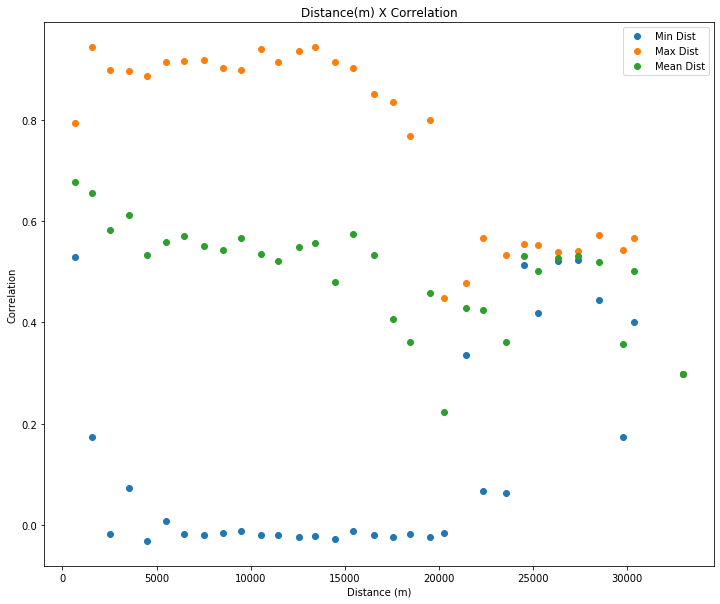

In [0]:
dist_versus_correlations = dist_versus_correlations.sort_values(by ='dist')
dist_versus_correlations
# dist_versus_correlations.fillna(0)

import math

max_dist = dist_versus_correlations.loc[dist_versus_correlations['dist'].idxmax()]

ceil = math.ceil(max_dist['dist'])+1000

maxs = []
mins = []
means = []

for i in range(0, ceil, 1000):
  interval = dist_versus_correlations[dist_versus_correlations['dist'].between(i, i+1000)]
  
  if(len(interval)>0):
    corr_mean = interval['corr'].mean()
    dist_mean = interval['dist'].mean()
    means.append((corr_mean, dist_mean))
    
    max = interval.loc[interval['corr'].idxmax()]
    min = interval.loc[interval['corr'].idxmin()]
    maxs.append((max['corr'], dist_mean))
    mins.append((min['corr'], dist_mean))
       
mins_dataframe = pd.DataFrame(mins)
maxs_dataframe = pd.DataFrame(maxs)
means_dataframe = pd.DataFrame(means)

mins_dataframe.columns ={'corr', 'dist'}
maxs_dataframe.columns ={'corr', 'dist'}
means_dataframe.columns ={'corr', 'dist'}

# print(maxs_dataframe)
# print(means_dataframe)

means_dataframe
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,10))

plt.plot(mins_dataframe['dist'], mins_dataframe['corr'], 'o', label='Min Dist')
plt.plot(maxs_dataframe['dist'], maxs_dataframe['corr'], 'o', label='Max Dist')
plt.plot(means_dataframe['dist'], means_dataframe['corr'], 'o', label='Mean Dist')
plt.title('Distance(m) X Correlation')
plt.ylabel('Correlation')
plt.xlabel('Distance (m)')
plt.legend()
plt.show()

In [0]:
# import matplotlib.pyplot as plt
# import numpy as np

# # #Normalizing Distance Column
# # from sklearn import preprocessing

# # min_max_scaler = preprocessing.MinMaxScaler()
# # np_scaled = min_max_scaler.fit_transform(dist_versus_correlations)
# # cols = {'dist', 'corr'}
# # dist_versus_correlations_normalized = pd.DataFrame(np_scaled, columns = cols)
# # dist_versus_correlations_normalized

# # ax1 = dist_versus_correlations_normalized.plot.scatter(x='corr', y='dist', c='DarkBlue', figsize=(15, 15))
# ax1 = dist_versus_correlations.plot.scatter(x='dist', y='corr', c='DarkBlue', figsize=(15, 15))

# plt.xticks(np.arange(0, max(dist_versus_correlations['dist']+2000), step=2000))
# plt.yticks(np.arange(0, 1.2, step=0.2))
# plt.xlabel('Distance (m)')
# plt.ylabel('Correlation')
# plt.title('Distance (m) X Correlation')
# plt.savefig('dist_versus_correlations.pdf')

# plt.show()

### G2 - correlação X mobilidade: espero uma nuvem de pontos ainda (talvez menos poluída do que no caso anterior) - e vale a pena ver a correlação média para cada valor de faixa de mobilidade 

In [0]:
import pandas as pd

mob = pd.read_excel('Matriz1_OD.xlsx')
mob.drop('x', axis=1, inplace=True)
mob.index += 1
mob.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
1,12551.287532,3884.909386,2139.306099,1511.101032,1769.267258,4652.365947,3548.657851,3076.135848,4704.470735,1795.279694,868.290108,1274.558046,5345.528490,4051.870101,164.673977,3037.828271,909.300760,1269.767174,1376.230984,2112.646679,1121.270772,1732.568066,4460.757188,956.364241,4843.301871,772.622837,737.047979,1534.600464,2543.566741,2952.743889,2823.759956,2233.041453,212.896040,1845.978239,74.935252,53.674457,801.742424,969.066225,654.958084,287.697374,0,2527.451697,2379.099709,5546.939814,261.610345,0.000000,917.838346,447.540984,222.001203,0,58.336842,0,82.598485,630.939469,0
2,4147.999661,7455.479973,570.645207,136.734007,442.085751,1298.582079,1658.157248,1793.877978,1075.108533,194.000000,85.163642,207.551407,1949.252105,1494.826841,80.471380,89.584296,388.574167,595.199353,84.661174,100.458939,44.080292,447.365197,334.109893,99.505263,374.988742,178.297578,134.873060,0.000000,947.900332,484.134607,375.610298,622.593784,13.518519,847.478716,215.438849,0.000000,147.689394,270.437086,552.935501,59.844176,0,316.918537,67.673077,504.853864,356.741379,111.444444,239.436090,104.170404,65.070843,0,43.752632,0,26.022732,93.407960,0
3,2155.672595,622.730409,4170.350540,1267.406318,1075.268598,325.614291,447.202006,307.004202,1058.034314,931.200000,191.993697,207.960555,441.071556,259.224429,0.000000,134.376443,226.278547,292.734080,314.957768,483.737374,164.314405,864.713469,258.176258,0.000000,437.291603,0.000000,37.030100,410.250000,210.644518,339.713368,130.527454,405.530058,32.073529,149.035973,46.834532,64.147059,0.000000,45.072848,19.263473,62.071795,0,458.860549,302.765837,542.260079,71.348276,0.000000,39.906015,0.000000,112.069190,0,14.584211,0,0.000000,0.000000,0
4,1347.752240,164.080808,1294.753119,2816.720539,161.374358,355.508418,410.202020,109.387205,329.530174,77.600000,82.040404,54.693603,273.468013,136.734007,0.000000,0.000000,0.000000,54.693603,27.346801,48.373737,27.346801,350.215552,0.000000,33.168421,109.387205,0.000000,0.000000,54.693603,0.000000,164.080808,54.693603,54.693603,0.000000,54.693603,0.000000,0.000000,27.346801,0.000000,19.263473,7.758974,0,191.427609,0.000000,27.346801,0.000000,0.000000,0.000000,0.000000,8.713115,0,0.000000,0,27.346801,0.000000,0
5,1563.207159,483.157116,1033.509521,161.374358,1381.564014,849.941677,566.265152,219.989975,636.967404,476.080702,398.142253,307.174981,479.469647,456.818177,115.352381,44.792148,20.266436,350.466039,220.929670,145.121212,112.800935,504.458060,800.208252,99.505263,524.649409,143.505403,24.640351,73.921053,105.322259,715.672057,123.094276,275.156984,24.640351,211.261538,9.366906,0.000000,63.295455,45.072848,38.526946,38.794872,0,763.514192,270.692308,219.944444,23.782759,49.280702,198.677082,0.000000,33.353466,0,0.000000,0,0.000000,0.000000,0


In [0]:
def sum_mob(x):
  return (mob.iloc[int(x[0])-1, int(x[1])-1]+mob.iloc[int(x[1])-1, int(x[0])-1])

correlations = pd.read_csv('correlationsX1X2Corr.csv')
correlations = correlations.astype({"X1": int, "X2": int})
correlations.head()

,X1,X2,corr
0,1,2,0.791506
1,1,3,0.554248
2,1,4,0.806739
3,1,5,0.794176
4,1,6,0.668890


In [0]:
correlations['mob'] = correlations.apply(lambda x: sum_mob(x), axis=1)
correlations.head()

,X1,X2,corr,mob
0,1,2,0.791506,8032.909047
1,1,3,0.554248,4294.978694
2,1,4,0.806739,2858.853272
3,1,5,0.794176,3332.474417
4,1,6,0.668890,9223.154459


In [0]:
mob_versus_correlations = correlations[['mob', 'corr']]
mob_versus_correlations.head()

,mob,corr
0,8032.909047,0.791506
1,4294.978694,0.554248
2,2858.853272,0.806739
3,3332.474417,0.794176
4,9223.154459,0.668890


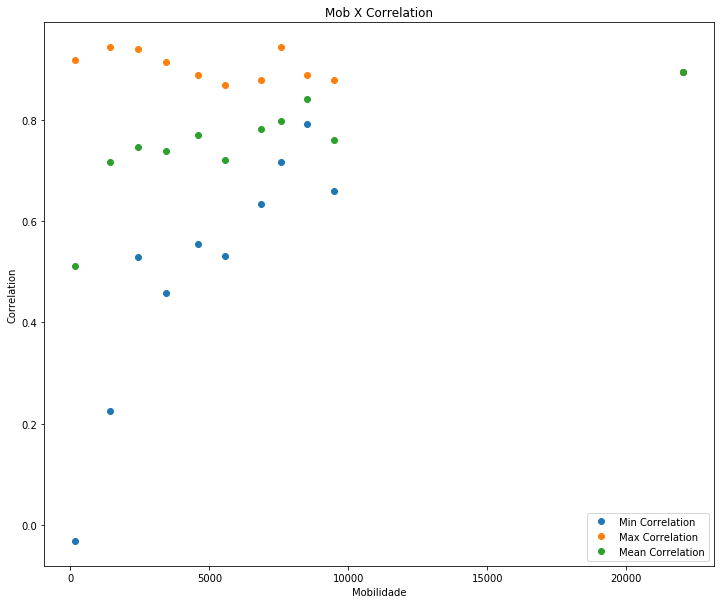

In [0]:
mob_versus_correlations = mob_versus_correlations.sort_values(by ='mob')
mob_versus_correlations
mob_versus_correlations.fillna(0)

import math

max_dist = mob_versus_correlations.loc[mob_versus_correlations['mob'].idxmax()]

ceil = math.ceil(max_dist['mob'])+1000

maxs = []
mins = []
means = []

for i in range(0, ceil, 1000):
  interval = mob_versus_correlations[mob_versus_correlations['mob'].between(i, i+1000)]
  
  if(len(interval)>0):
    corr_mean = interval['corr'].mean()
    mob_mean = interval['mob'].mean()
    means.append((corr_mean, mob_mean))

    max = interval.loc[interval['corr'].idxmax()]
    min = interval.loc[interval['corr'].idxmin()]
    maxs.append((max['corr'], mob_mean))
    mins.append((min['corr'], mob_mean))

   

mins_dataframe = pd.DataFrame(mins)
maxs_dataframe = pd.DataFrame(maxs)
means_dataframe = pd.DataFrame(means)

mins_dataframe.columns ={'corr', 'mob'}
maxs_dataframe.columns ={'corr', 'mob'}
means_dataframe.columns ={'corr', 'mob'}

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,10))

plt.plot(mins_dataframe['mob'], mins_dataframe['corr'], 'o', label='Min Correlation')
plt.plot(maxs_dataframe['mob'], maxs_dataframe['corr'], 'o', label='Max Correlation')
plt.plot(means_dataframe['mob'], means_dataframe['corr'], 'o', label='Mean Correlation')
plt.title('Mob X Correlation')
plt.ylabel('Correlation')
plt.xlabel('Mobilidade')
plt.legend()
plt.show()

In [0]:
# import matplotlib.pyplot as plt

# ax1 = mob_versus_correlations.plot.scatter(x='mob', y='corr', c='DarkRed', figsize=(15, 15))

# plt.xlabel('Mob')
# plt.ylabel('Correlation')
# plt.title('Mob X Correlation')
# plt.savefig('mob_versus_correlations.pdf')

# plt.show()

###G3 - análogo ao 1 mas considerando a correlação máxima (com atraso), e vér media por faixa

In [0]:
import pandas as pd

dist = pd.read_excel('Matriz2_Distancias_ZT.xlsx')
dist.drop('ZT', axis=1, inplace=True)
dist.index += 1

dist.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
1,0.000000,1476.718825,1576.908816,1789.142336,870.921123,1504.660907,1875.497068,3037.629836,3222.811990,3200.724483,4048.280881,4875.552269,3871.511224,3135.535021,3494.202669,3896.805528,4613.744136,5926.713934,7219.248223,6331.263474,9630.280931,5663.172588,8942.204735,9239.472956,6857.246236,9584.794982,10233.610560,8124.273927,7549.409326,5037.048715,7595.337444,6172.911597,6839.390857,6057.718250,1707.524134,8049.111442,5266.282800,6312.314280,10556.969665,5374.083056,11420.587370,10961.879275,9906.424483,10674.120724,12401.840419,12400.597015,10437.861320,21287.463724,3824.743821,7059.329614,9685.437253,5771.339178,7367.589360,7578.644822,10876.493801
2,1476.718825,0.000000,1012.275199,1777.127182,1986.767509,2980.023255,3163.703621,2159.615749,2577.565242,3639.298199,5104.767408,6164.813439,5297.800704,4545.587143,4310.393417,3361.860189,3562.824602,5054.002452,6466.687544,6024.258150,9667.018765,6318.204883,9641.912211,10454.218732,8247.267747,11000.704100,11675.926872,9570.599248,9021.232801,6513.093843,9057.903760,7572.556138,8070.752556,6904.089001,2050.314751,8394.778552,4553.110075,5408.022395,9730.254463,4077.545081,10208.165205,9978.710582,9188.215627,10481.715732,11861.307317,12987.762392,11884.044322,20281.885280,3794.083713,7303.312503,10035.409487,6229.127001,6964.051848,6102.499146,9401.433409
3,1576.908816,1012.275199,0.000000,800.646443,1585.073554,2938.325517,3452.389330,3165.137212,1722.895254,2673.784378,4350.737973,5575.151431,4926.745061,4662.945641,4946.765894,4372.202657,4508.498441,4377.541210,5716.461676,5078.596809,8666.021810,5368.512304,8686.722130,9748.908435,7761.200143,10542.649571,11277.214255,9194.939880,8758.381508,6319.505950,8997.116040,7688.940234,8415.691672,7542.714138,2821.246440,9265.315082,5559.025153,6378.916017,10704.238591,3862.671573,9853.383465,9397.788339,8426.396500,9520.637775,11016.910560,12001.660513,11495.576491,21184.955385,2785.010803,6291.373456,9025.786284,7048.927255,7974.360205,6392.315843,9742.851610
4,1789.142336,1777.127182,800.646443,0.000000,1368.407672,2832.145711,3569.213565,3936.086821,1542.322142,1874.204549,3628.279431,4945.509792,4465.398022,4590.975837,5283.187630,5103.519826,5307.049919,4252.455268,5473.174402,4556.937087,7998.402770,4567.987543,7886.954393,9029.373228,7181.823199,9967.593133,10738.397923,8681.259896,8326.920610,5965.847317,8712.880467,7554.767572,8456.895222,7842.524230,3334.193549,9778.442333,6328.459473,7172.861834,11497.787553,4179.644855,9957.707415,9298.352815,8138.613592,8943.717888,10612.711087,11212.467566,10962.789061,21984.348696,2114.325379,5553.483172,8270.870313,7521.651942,8699.330792,6972.376854,10329.236500
5,870.921123,1986.767509,1585.073554,1368.407672,0.000000,1463.781609,2273.097117,3841.185903,2910.564826,2388.286033,3218.553952,4179.581845,3368.924767,3222.583035,4137.274381,4759.488989,5390.932293,5618.748010,6810.327553,5710.510859,8856.016519,4793.922790,8071.467707,8494.333770,6274.188917,9039.999956,9743.042901,7648.492642,7179.358488,4734.634237,7426.834736,6197.745092,7096.368650,6624.054644,2563.896159,8803.118969,6117.676330,7136.005993,11402.719983,5421.713554,11308.522733,10662.811264,9446.756994,9968.673525,11833.899959,11530.745942,9956.897877,22101.057680,3155.568689,6244.749673,8841.202364,6509.484989,8238.205489,7941.190240,11280.147934


In [0]:
correlations = pd.read_csv('maxCorrelations.csv')
correlations.drop('Unnamed: 0', axis=1, inplace=True)
correlations.head()

,X1,X2,corr,highest_corr,highest_k
0,1,2,0.791506,0.791506,['k =0']
1,1,3,0.554248,0.554248,['k =0']
2,1,4,0.806739,0.806739,['k =0']
3,1,5,0.794176,0.794176,['k =0']
4,1,6,0.668890,0.668890,['k =0']


In [0]:
data = correlations.astype({"X1": int, "X2": int})
data = data[['X1', 'X2', 'highest_corr']]
data.head()

,X1,X2,highest_corr
0,1,2,0.791506
1,1,3,0.554248
2,1,4,0.806739
3,1,5,0.794176
4,1,6,0.668890


In [0]:
data['dist'] = data.apply(lambda x: dist.iloc[int(x[0])-1, int(x[1])-1], axis=1)
data.head()

,X1,X2,highest_corr,dist
0,1,2,0.791506,1476.718825
1,1,3,0.554248,1576.908816
2,1,4,0.806739,1789.142336
3,1,5,0.794176,870.921123
4,1,6,0.668890,1504.660907


In [0]:
data = data[['highest_corr', 'dist']]
data.head()

,highest_corr,dist
0,0.791506,1476.718825
1,0.554248,1576.908816
2,0.806739,1789.142336
3,0.794176,870.921123
4,0.668890,1504.660907


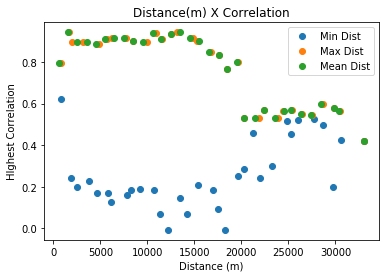

In [0]:
data = data.sort_values(by ='dist')
data
data.fillna(0)

import math

max_dist = data.loc[dist_versus_correlations['dist'].idxmax()]

ceil = math.ceil(max_dist['dist'])+1000

maxs = []
mins = []
means = []

for i in range(0, ceil, 1000):
  interval = data[data['dist'].between(i, i+1000)]
  
  if(len(interval)>0):
    max = interval.loc[interval['highest_corr'].idxmax()]
    min = interval.loc[interval['highest_corr'].idxmin()]
    maxs.append((max['highest_corr'], max['dist']))
    mins.append((min['highest_corr'], min['dist']))

    corr_mean = interval['highest_corr'].mean()
    dist_mean = interval['dist'].mean()
    means.append((corr_mean, dist_mean))

mins_dataframe = pd.DataFrame(mins)
maxs_dataframe = pd.DataFrame(maxs)
means_dataframe = pd.DataFrame(means)

mins_dataframe.columns ={'highest_corr', 'dist'}
maxs_dataframe.columns ={'highest_corr', 'dist'}
means_dataframe.columns ={'highest_corr', 'dist'}

import matplotlib.pyplot as plt
import numpy as np

plt.plot(mins_dataframe['dist'], mins_dataframe['highest_corr'], 'o', label='Min Dist')
plt.plot(maxs_dataframe['dist'], maxs_dataframe['highest_corr'], 'o', label='Max Dist')
plt.plot(means_dataframe['dist'], maxs_dataframe['highest_corr'], 'o', label='Mean Dist')
plt.title('Distance(m) X Correlation')
plt.ylabel('Highest Correlation')
plt.xlabel('Distance (m)')
plt.legend()
plt.show()

In [0]:
# import matplotlib.pyplot as plt

# # #Normalizing Distance Column
# # from sklearn import preprocessing

# # min_max_scaler = preprocessing.MinMaxScaler()
# # np_scaled = min_max_scaler.fit_transform(dist_versus_correlations)
# # cols = {'highest_corr', 'dist'}
# # data_normalized = pd.DataFrame(np_scaled, columns = cols)
# # data_normalized

# # ax1 = data_normalized.plot.scatter(x='highest_corr', y='dist', c='DarkBlue', figsize=(15, 15))
# ax1 = data.plot.scatter(x='dist', y='highest_corr', c='DarkBlue', figsize=(15, 15))

# plt.xlabel('Distance (m)')
# plt.ylabel('Highest Correlation')
# plt.title('Distance (m) X Highest Correlation')
# plt.savefig('distance_versus_highest_correlation.pdf')

# plt.show()

###G4 - análogo ao 2 mas considerando a correlação máxima (com atraso), e vér media por faixa

In [0]:
import pandas as pd

mob = pd.read_excel('Matriz1_OD.xlsx')
mob.drop('x', axis=1, inplace=True)
mob.index += 1
mob.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
1,12551.287532,3884.909386,2139.306099,1511.101032,1769.267258,4652.365947,3548.657851,3076.135848,4704.470735,1795.279694,868.290108,1274.558046,5345.528490,4051.870101,164.673977,3037.828271,909.300760,1269.767174,1376.230984,2112.646679,1121.270772,1732.568066,4460.757188,956.364241,4843.301871,772.622837,737.047979,1534.600464,2543.566741,2952.743889,2823.759956,2233.041453,212.896040,1845.978239,74.935252,53.674457,801.742424,969.066225,654.958084,287.697374,0,2527.451697,2379.099709,5546.939814,261.610345,0.000000,917.838346,447.540984,222.001203,0,58.336842,0,82.598485,630.939469,0
2,4147.999661,7455.479973,570.645207,136.734007,442.085751,1298.582079,1658.157248,1793.877978,1075.108533,194.000000,85.163642,207.551407,1949.252105,1494.826841,80.471380,89.584296,388.574167,595.199353,84.661174,100.458939,44.080292,447.365197,334.109893,99.505263,374.988742,178.297578,134.873060,0.000000,947.900332,484.134607,375.610298,622.593784,13.518519,847.478716,215.438849,0.000000,147.689394,270.437086,552.935501,59.844176,0,316.918537,67.673077,504.853864,356.741379,111.444444,239.436090,104.170404,65.070843,0,43.752632,0,26.022732,93.407960,0
3,2155.672595,622.730409,4170.350540,1267.406318,1075.268598,325.614291,447.202006,307.004202,1058.034314,931.200000,191.993697,207.960555,441.071556,259.224429,0.000000,134.376443,226.278547,292.734080,314.957768,483.737374,164.314405,864.713469,258.176258,0.000000,437.291603,0.000000,37.030100,410.250000,210.644518,339.713368,130.527454,405.530058,32.073529,149.035973,46.834532,64.147059,0.000000,45.072848,19.263473,62.071795,0,458.860549,302.765837,542.260079,71.348276,0.000000,39.906015,0.000000,112.069190,0,14.584211,0,0.000000,0.000000,0
4,1347.752240,164.080808,1294.753119,2816.720539,161.374358,355.508418,410.202020,109.387205,329.530174,77.600000,82.040404,54.693603,273.468013,136.734007,0.000000,0.000000,0.000000,54.693603,27.346801,48.373737,27.346801,350.215552,0.000000,33.168421,109.387205,0.000000,0.000000,54.693603,0.000000,164.080808,54.693603,54.693603,0.000000,54.693603,0.000000,0.000000,27.346801,0.000000,19.263473,7.758974,0,191.427609,0.000000,27.346801,0.000000,0.000000,0.000000,0.000000,8.713115,0,0.000000,0,27.346801,0.000000,0
5,1563.207159,483.157116,1033.509521,161.374358,1381.564014,849.941677,566.265152,219.989975,636.967404,476.080702,398.142253,307.174981,479.469647,456.818177,115.352381,44.792148,20.266436,350.466039,220.929670,145.121212,112.800935,504.458060,800.208252,99.505263,524.649409,143.505403,24.640351,73.921053,105.322259,715.672057,123.094276,275.156984,24.640351,211.261538,9.366906,0.000000,63.295455,45.072848,38.526946,38.794872,0,763.514192,270.692308,219.944444,23.782759,49.280702,198.677082,0.000000,33.353466,0,0.000000,0,0.000000,0.000000,0


In [0]:
correlations = pd.read_csv('maxCorrelations.csv')
correlations.drop('Unnamed: 0', axis=1, inplace=True)
correlations = correlations.astype({"X1": int, "X2": int})
correlations.head()

,X1,X2,corr,highest_corr,highest_k
0,1,2,0.791506,0.791506,['k =0']
1,1,3,0.554248,0.554248,['k =0']
2,1,4,0.806739,0.806739,['k =0']
3,1,5,0.794176,0.794176,['k =0']
4,1,6,0.668890,0.668890,['k =0']


In [0]:
def sum_mob(x):
  return (mob.iloc[int(x[0])-1, int(x[1])-1]+mob.iloc[int(x[1])-1, int(x[0])-1])

correlations['mob'] = correlations.apply(lambda x: sum_mob(x), axis=1)
correlations.head()

,X1,X2,corr,highest_corr,highest_k,mob
0,1,2,0.791506,0.791506,['k =0'],8032.909047
1,1,3,0.554248,0.554248,['k =0'],4294.978694
2,1,4,0.806739,0.806739,['k =0'],2858.853272
3,1,5,0.794176,0.794176,['k =0'],3332.474417
4,1,6,0.668890,0.668890,['k =0'],9223.154459


In [0]:
mob_versus_max_correlations = correlations[['mob', 'highest_corr']]
mob_versus_max_correlations.head()

,mob,highest_corr
0,8032.909047,0.791506
1,4294.978694,0.554248
2,2858.853272,0.806739
3,3332.474417,0.794176
4,9223.154459,0.668890


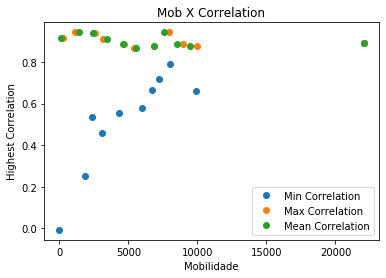

In [0]:
mob_versus_max_correlations = mob_versus_max_correlations.sort_values(by ='mob')
mob_versus_max_correlations
mob_versus_max_correlations.fillna(0)

import math

max_dist = mob_versus_max_correlations.loc[mob_versus_max_correlations['mob'].idxmax()]

ceil = math.ceil(max_dist['mob'])+1000

maxs = []
mins = []
means = []

for i in range(0, ceil, 1000):
  interval = mob_versus_max_correlations[mob_versus_max_correlations['mob'].between(i, i+1000)]
  
  if(len(interval)>0):
    max = interval.loc[interval['highest_corr'].idxmax()]
    min = interval.loc[interval['highest_corr'].idxmin()]
    maxs.append((max['highest_corr'], max['mob']))
    mins.append((min['highest_corr'], min['mob']))

    corr_mean = interval['highest_corr'].mean()
    dist_mean = interval['mob'].mean()
    means.append((corr_mean, dist_mean))

mins_dataframe = pd.DataFrame(mins)
maxs_dataframe = pd.DataFrame(maxs)
means_dataframe = pd.DataFrame(means)

mins_dataframe.columns ={'highest_corr', 'mob'}
maxs_dataframe.columns ={'highest_corr', 'mob'}
means_dataframe.columns ={'highest_corr', 'mob'}

import matplotlib.pyplot as plt
import numpy as np

plt.plot(mins_dataframe['mob'], mins_dataframe['highest_corr'], 'o', label='Min Correlation')
plt.plot(maxs_dataframe['mob'], maxs_dataframe['highest_corr'], 'o', label='Max Correlation')
plt.plot(means_dataframe['mob'], maxs_dataframe['highest_corr'], 'o', label='Mean Correlation')
plt.title('Mob X Correlation')
plt.ylabel('Highest Correlation')
plt.xlabel('Mobilidade')
plt.legend()
plt.show()

In [0]:
# import matplotlib.pyplot as plt

# ax1 = mob_versus_max_correlations.plot.scatter(x='mob', y='highest_corr', c='DarkRed', figsize=(15, 15))

# plt.xlabel('Mob')
# plt.ylabel('Highest Correlation')
# plt.title('Mob X Highest Correlation')
# plt.savefig('mob_versus_highest_correlation.pdf')

# plt.show()

###G5 - atraso X distância geográfica, e vér media por faixa

In [0]:
import pandas as pd

dist = pd.read_excel('Matriz2_Distancias_ZT.xlsx')
dist.drop('ZT', axis=1, inplace=True)
dist.index += 1
dist.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
1,0.000000,1476.718825,1576.908816,1789.142336,870.921123,1504.660907,1875.497068,3037.629836,3222.811990,3200.724483,4048.280881,4875.552269,3871.511224,3135.535021,3494.202669,3896.805528,4613.744136,5926.713934,7219.248223,6331.263474,9630.280931,5663.172588,8942.204735,9239.472956,6857.246236,9584.794982,10233.610560,8124.273927,7549.409326,5037.048715,7595.337444,6172.911597,6839.390857,6057.718250,1707.524134,8049.111442,5266.282800,6312.314280,10556.969665,5374.083056,11420.587370,10961.879275,9906.424483,10674.120724,12401.840419,12400.597015,10437.861320,21287.463724,3824.743821,7059.329614,9685.437253,5771.339178,7367.589360,7578.644822,10876.493801
2,1476.718825,0.000000,1012.275199,1777.127182,1986.767509,2980.023255,3163.703621,2159.615749,2577.565242,3639.298199,5104.767408,6164.813439,5297.800704,4545.587143,4310.393417,3361.860189,3562.824602,5054.002452,6466.687544,6024.258150,9667.018765,6318.204883,9641.912211,10454.218732,8247.267747,11000.704100,11675.926872,9570.599248,9021.232801,6513.093843,9057.903760,7572.556138,8070.752556,6904.089001,2050.314751,8394.778552,4553.110075,5408.022395,9730.254463,4077.545081,10208.165205,9978.710582,9188.215627,10481.715732,11861.307317,12987.762392,11884.044322,20281.885280,3794.083713,7303.312503,10035.409487,6229.127001,6964.051848,6102.499146,9401.433409
3,1576.908816,1012.275199,0.000000,800.646443,1585.073554,2938.325517,3452.389330,3165.137212,1722.895254,2673.784378,4350.737973,5575.151431,4926.745061,4662.945641,4946.765894,4372.202657,4508.498441,4377.541210,5716.461676,5078.596809,8666.021810,5368.512304,8686.722130,9748.908435,7761.200143,10542.649571,11277.214255,9194.939880,8758.381508,6319.505950,8997.116040,7688.940234,8415.691672,7542.714138,2821.246440,9265.315082,5559.025153,6378.916017,10704.238591,3862.671573,9853.383465,9397.788339,8426.396500,9520.637775,11016.910560,12001.660513,11495.576491,21184.955385,2785.010803,6291.373456,9025.786284,7048.927255,7974.360205,6392.315843,9742.851610
4,1789.142336,1777.127182,800.646443,0.000000,1368.407672,2832.145711,3569.213565,3936.086821,1542.322142,1874.204549,3628.279431,4945.509792,4465.398022,4590.975837,5283.187630,5103.519826,5307.049919,4252.455268,5473.174402,4556.937087,7998.402770,4567.987543,7886.954393,9029.373228,7181.823199,9967.593133,10738.397923,8681.259896,8326.920610,5965.847317,8712.880467,7554.767572,8456.895222,7842.524230,3334.193549,9778.442333,6328.459473,7172.861834,11497.787553,4179.644855,9957.707415,9298.352815,8138.613592,8943.717888,10612.711087,11212.467566,10962.789061,21984.348696,2114.325379,5553.483172,8270.870313,7521.651942,8699.330792,6972.376854,10329.236500
5,870.921123,1986.767509,1585.073554,1368.407672,0.000000,1463.781609,2273.097117,3841.185903,2910.564826,2388.286033,3218.553952,4179.581845,3368.924767,3222.583035,4137.274381,4759.488989,5390.932293,5618.748010,6810.327553,5710.510859,8856.016519,4793.922790,8071.467707,8494.333770,6274.188917,9039.999956,9743.042901,7648.492642,7179.358488,4734.634237,7426.834736,6197.745092,7096.368650,6624.054644,2563.896159,8803.118969,6117.676330,7136.005993,11402.719983,5421.713554,11308.522733,10662.811264,9446.756994,9968.673525,11833.899959,11530.745942,9956.897877,22101.057680,3155.568689,6244.749673,8841.202364,6509.484989,8238.205489,7941.190240,11280.147934


In [0]:
correlations = pd.read_csv('maxCorrelations.csv')
correlations.drop('Unnamed: 0', axis=1, inplace=True)

data = correlations.astype({"X1": int, "X2": int})
data.head()

,X1,X2,corr,highest_corr,highest_k
0,1,2,0.791506,0.791506,['k =0']
1,1,3,0.554248,0.554248,['k =0']
2,1,4,0.806739,0.806739,['k =0']
3,1,5,0.794176,0.794176,['k =0']
4,1,6,0.668890,0.668890,['k =0']


In [0]:
data = data[['X1', 'X2', 'highest_k']]
data['dist'] = correlations.apply(lambda x: dist.iloc[int(x[0])-1, int(x[1])-1], axis=1)
data = data[['highest_k', 'dist']]
data.head()

,highest_k,dist
0,['k =0'],1476.718825
1,['k =0'],1576.908816
2,['k =0'],1789.142336
3,['k =0'],870.921123
4,['k =0'],1504.660907


In [0]:
def return_k(highest_k):
  start_pt = highest_k.find("=")
  end_pt = highest_k.find("\'", start_pt + 1) 
  quote = highest_k[start_pt + 1: end_pt]
  return(quote)

data['highest_k_values'] = data.apply(lambda x: return_k(x[0]), axis=1)
data['highest_k_values'] = data['highest_k_values'].replace('[', 'NaN')
data = data.astype({"highest_k_values": float})
data.head()

,highest_k,dist,highest_k_values
0,['k =0'],1476.718825,0.0
1,['k =0'],1576.908816,0.0
2,['k =0'],1789.142336,0.0
3,['k =0'],870.921123,0.0
4,['k =0'],1504.660907,0.0


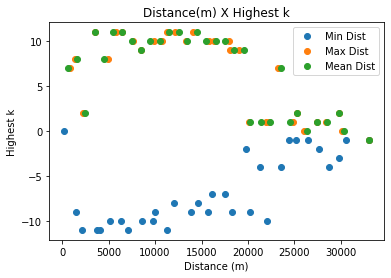

In [0]:
data = data.sort_values(by ='dist')
data
data.fillna(0)

import math

max_dist = data.loc[dist_versus_correlations['dist'].idxmax()]

ceil = math.ceil(max_dist['dist'])+1000

maxs = []
mins = []
means = []

for i in range(0, ceil, 1000):
  interval = data[data['dist'].between(i, i+1000)]
  
  if(len(interval)>0):
    max = interval.loc[interval['highest_k_values'].idxmax()]
    min = interval.loc[interval['highest_k_values'].idxmin()]
    maxs.append((max['highest_k_values'], max['dist']))
    mins.append((min['highest_k_values'], min['dist']))

    corr_mean = interval['highest_k_values'].mean()
    dist_mean = interval['dist'].mean()
    means.append((corr_mean, dist_mean))

mins_dataframe = pd.DataFrame(mins)
maxs_dataframe = pd.DataFrame(maxs)
means_dataframe = pd.DataFrame(means)

mins_dataframe.columns ={'highest_k_values', 'dist'}
maxs_dataframe.columns ={'highest_k_values', 'dist'}
means_dataframe.columns ={'highest_k_values', 'dist'}

import matplotlib.pyplot as plt
import numpy as np

plt.plot(mins_dataframe['dist'], mins_dataframe['highest_k_values'], 'o', label='Min Dist')
plt.plot(maxs_dataframe['dist'], maxs_dataframe['highest_k_values'], 'o', label='Max Dist')
plt.plot(means_dataframe['dist'], maxs_dataframe['highest_k_values'], 'o', label='Mean Dist')
plt.title('Distance(m) X Highest k')
plt.ylabel('Highest k')
plt.xlabel('Distance (m)')
plt.legend()
plt.show()

In [0]:
# import matplotlib.pyplot as plt

# ax1 = data.plot.scatter(x='dist', y='highest_k_values', c='DarkBlue', figsize=(15, 15))

# plt.xlabel('Distance (m)')
# plt.ylabel('Highest k')
# plt.title('Distance (m) X Highest k')
# plt.savefig('distance_versus_highest_k.pdf')

# plt.show()

###G6 - atraso X mobilidade, e vér media por faixa

In [0]:
import pandas as pd

mob = pd.read_excel('Matriz1_OD.xlsx')
mob.drop('x', axis=1, inplace=True)
mob.index += 1
mob.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
1,12551.287532,3884.909386,2139.306099,1511.101032,1769.267258,4652.365947,3548.657851,3076.135848,4704.470735,1795.279694,868.290108,1274.558046,5345.528490,4051.870101,164.673977,3037.828271,909.300760,1269.767174,1376.230984,2112.646679,1121.270772,1732.568066,4460.757188,956.364241,4843.301871,772.622837,737.047979,1534.600464,2543.566741,2952.743889,2823.759956,2233.041453,212.896040,1845.978239,74.935252,53.674457,801.742424,969.066225,654.958084,287.697374,0,2527.451697,2379.099709,5546.939814,261.610345,0.000000,917.838346,447.540984,222.001203,0,58.336842,0,82.598485,630.939469,0
2,4147.999661,7455.479973,570.645207,136.734007,442.085751,1298.582079,1658.157248,1793.877978,1075.108533,194.000000,85.163642,207.551407,1949.252105,1494.826841,80.471380,89.584296,388.574167,595.199353,84.661174,100.458939,44.080292,447.365197,334.109893,99.505263,374.988742,178.297578,134.873060,0.000000,947.900332,484.134607,375.610298,622.593784,13.518519,847.478716,215.438849,0.000000,147.689394,270.437086,552.935501,59.844176,0,316.918537,67.673077,504.853864,356.741379,111.444444,239.436090,104.170404,65.070843,0,43.752632,0,26.022732,93.407960,0
3,2155.672595,622.730409,4170.350540,1267.406318,1075.268598,325.614291,447.202006,307.004202,1058.034314,931.200000,191.993697,207.960555,441.071556,259.224429,0.000000,134.376443,226.278547,292.734080,314.957768,483.737374,164.314405,864.713469,258.176258,0.000000,437.291603,0.000000,37.030100,410.250000,210.644518,339.713368,130.527454,405.530058,32.073529,149.035973,46.834532,64.147059,0.000000,45.072848,19.263473,62.071795,0,458.860549,302.765837,542.260079,71.348276,0.000000,39.906015,0.000000,112.069190,0,14.584211,0,0.000000,0.000000,0
4,1347.752240,164.080808,1294.753119,2816.720539,161.374358,355.508418,410.202020,109.387205,329.530174,77.600000,82.040404,54.693603,273.468013,136.734007,0.000000,0.000000,0.000000,54.693603,27.346801,48.373737,27.346801,350.215552,0.000000,33.168421,109.387205,0.000000,0.000000,54.693603,0.000000,164.080808,54.693603,54.693603,0.000000,54.693603,0.000000,0.000000,27.346801,0.000000,19.263473,7.758974,0,191.427609,0.000000,27.346801,0.000000,0.000000,0.000000,0.000000,8.713115,0,0.000000,0,27.346801,0.000000,0
5,1563.207159,483.157116,1033.509521,161.374358,1381.564014,849.941677,566.265152,219.989975,636.967404,476.080702,398.142253,307.174981,479.469647,456.818177,115.352381,44.792148,20.266436,350.466039,220.929670,145.121212,112.800935,504.458060,800.208252,99.505263,524.649409,143.505403,24.640351,73.921053,105.322259,715.672057,123.094276,275.156984,24.640351,211.261538,9.366906,0.000000,63.295455,45.072848,38.526946,38.794872,0,763.514192,270.692308,219.944444,23.782759,49.280702,198.677082,0.000000,33.353466,0,0.000000,0,0.000000,0.000000,0


In [0]:
correlations = pd.read_csv('maxCorrelations.csv')
correlations.drop('Unnamed: 0', axis=1, inplace=True)

data = correlations.astype({"X1": int, "X2": int})
data = data[['X1', 'X2', 'highest_k']]

def sum_mob(x):
  return (mob.iloc[int(x[0])-1, int(x[1])-1]+mob.iloc[int(x[1])-1, int(x[0])-1])

data['mob'] = correlations.apply(lambda x: sum_mob(x), axis=1)
data = data[['highest_k', 'mob']]
data.head()

,highest_k,mob
0,['k =0'],8032.909047
1,['k =0'],4294.978694
2,['k =0'],2858.853272
3,['k =0'],3332.474417
4,['k =0'],9223.154459


In [0]:
def return_k(highest_k):
  start_pt = highest_k.find("=")
  end_pt = highest_k.find("\'", start_pt + 1) 
  quote = highest_k[start_pt + 1: end_pt]
  return(quote)

data['highest_k_values'] = data.apply(lambda x: return_k(x[0]), axis=1)
data['highest_k_values'] = data['highest_k_values'].replace('[', 'NaN')
data = data.astype({"highest_k_values": float})
data.head()

,highest_k,mob,highest_k_values
0,['k =0'],8032.909047,0.0
1,['k =0'],4294.978694,0.0
2,['k =0'],2858.853272,0.0
3,['k =0'],3332.474417,0.0
4,['k =0'],9223.154459,0.0


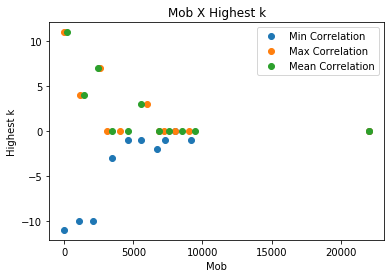

In [0]:
data = data.sort_values(by ='mob')
data
data.fillna(0)

import math

max_dist = data.loc[data['mob'].idxmax()]

ceil = math.ceil(max_dist['mob'])+1000

maxs = []
mins = []
means = []

for i in range(0, ceil, 1000):
  interval = data[data['mob'].between(i, i+1000)]
  
  if(len(interval)>0):
    max = interval.loc[interval['highest_k_values'].idxmax()]
    min = interval.loc[interval['highest_k_values'].idxmin()]
    maxs.append((max['highest_k_values'], max['mob']))
    mins.append((min['highest_k_values'], min['mob']))

    corr_mean = interval['highest_k_values'].mean()
    dist_mean = interval['mob'].mean()
    means.append((corr_mean, dist_mean))

mins_dataframe = pd.DataFrame(mins)
maxs_dataframe = pd.DataFrame(maxs)
means_dataframe = pd.DataFrame(means)

mins_dataframe.columns ={'highest_k_values', 'mob'}
maxs_dataframe.columns ={'highest_k_values', 'mob'}
means_dataframe.columns ={'highest_k_values', 'mob'}

import matplotlib.pyplot as plt
import numpy as np

plt.plot(mins_dataframe['mob'], mins_dataframe['highest_k_values'], 'o', label='Min Correlation')
plt.plot(maxs_dataframe['mob'], maxs_dataframe['highest_k_values'], 'o', label='Max Correlation')
plt.plot(means_dataframe['mob'], maxs_dataframe['highest_k_values'], 'o', label='Mean Correlation')
plt.title('Mob X Highest k')
plt.ylabel('Highest k')
plt.xlabel('Mob')
plt.legend()
plt.show()

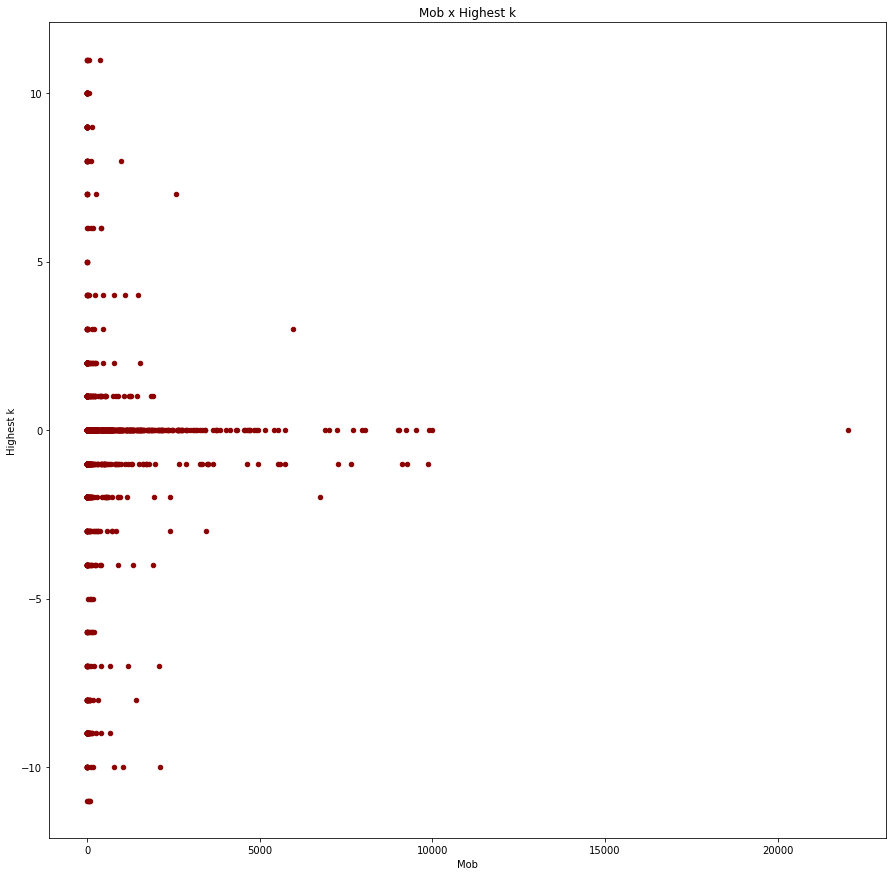

In [0]:
# import matplotlib.pyplot as plt

# ax1 = data.plot.scatter(x='mob', y='highest_k_values', c='DarkRed', figsize=(15, 15))

# plt.xlabel('Mob')
# plt.ylabel('Highest k')
# plt.title('Mob x Highest k')
# plt.savefig('mob_versus_highest_k.pdf')

# plt.show()